In [1]:
import pandas as pd
import numpy as np
import googletrans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OrdinalEncoder , LabelEncoder 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
%matplotlib inline
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
import xgboost as xgb

plt.style.use("dark_background")
pd.set_option('display.max_columns', None)

from utils.security import security_unique_values
import utils.data_prepare as dp 
import utils.learning as l 

In [2]:
train = pd.read_hdf('data/property.train.h5')

feature_engineering = Pipeline(steps= [
    #('get date', dp.DFTransform(lambda df: dp.date(df))),
    #('get metro name from breadcrumbs', dp.DFTransform(lambda df: dp.metro(df))),
    ('breadcrumbs',dp.DFTransform(lambda df: dp.breadcrumbs(df))),
    ('get unique values from Security:', dp.DFTransform(lambda df: dp.security(df))),
    ('make one hot encoding on security', dp.DFTransform(lambda df: dp.one_hot_encoding(df,'security_clean', security_unique_values)))
]) 

df = feature_engineering.fit_transform(train)
df.head()

num_feats = ['lat','lon','security'] + [col for col in df if col.endswith('_ohe')]
num_attribs = Pipeline(steps = [    
    ('fill_na', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = -1))
]) 


black_list = ['breadcrumbs','price','date','geo_block','owner','owner','Repair:','Fridge:','Phone:','Furniture:','Free layout:','It is possible to bargain:','Floor covering:','Room type:','Internet:','Kitchen furniture:','TV:','Washing machine:','Foundation type:','Overlap type:','Type of the building:','Playground:','Class:'] 

cat_feats = [elem  for elem in list(df.columns) if elem not in black_list+num_feats]
cat_attribs = Pipeline(steps = [    
    ('fill_na', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = "nan")),
    ('factorize',OrdinalEncoder(handle_unknown='ignore')) 
]) 

data_transform = ColumnTransformer(
    transformers=[
        ('cat',cat_attribs,cat_feats),
        ('num',num_attribs,num_feats)
    ])


pipeline = Pipeline(steps=[('data_transform',data_transform )])

df = pipeline.fit_transform(df[cat_feats+num_feats])

/Users/ewa.suknarowska/Desktop/pml8_competition/utils/data_prepare.py:373: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["lat"], df["lon"] = df.lat_lon.str


In [3]:
df = pd.DataFrame(df, columns = cat_feats+num_feats ) 
df

,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,nowa_moskwa,metro,m,gminy,lat,lon,security,drogie_ohe,access control system_ohe,alarm system_ohe,checkpoint_ohe,closed area_ohe,concierge_ohe,fenced area_ohe,fire system_ohe,high-quality and safe playgrounds._ohe,intercom_ohe,nan_ohe,parking_ohe,provided_ohe,round the clock protected area_ohe,round the clock security_ohe,secure area_ohe,the area with landscaping and the use of small architectural forms_ohe,video surveillance_ohe
0,1.0,1.0,2.0,1.0,1.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,18.0,199.0,118.0,-0.303060,-0.605557,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,14.0,27.0,111.0,-1.064900,-2.248218,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,14.0,199.0,118.0,-0.612480,-0.153997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,2.0,1.0,7.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,28.0,42.0,7.0,-0.506602,0.299148,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1.0,3.0,1.0,7.0,4.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,29.0,176.0,100.0,-1.450963,-0.025490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45689,5.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,18.0,40.0,91.0,-2.204536,-1.086002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45690,3.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,0.0,2.0,0.0,1.0,15.0,199.0,118.0,-0.115210,-0.861847,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45691,5.0,0.0,3.0,1.0,7.0,4.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,19.0,96.0,63.0,1.861109,-0.027998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45692,3.0,1.0,0.0,1.0,6.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,5.0,199.0,118.0,0.659780,1.163314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#TODO: tu popatrzec czy rto dobrze działa: 
def ln_exp_obj(true, preds):
    labels = true
    x = preds - labels
    exp_2x = np.exp(2*x)
    grad = (exp_2x -1 )/ (exp_2x + 1 )
    hess = (4 * exp_2x) / (exp_2x + 1 )**2 
    return grad, hess


model = xgb.XGBRegressor(n_estimators=70, learning_rate=0.1, max_depth=15, random_state=0, obj=ln_exp_obj)

def train_and_predict(model, X, y):
    model.fit(X, y)
    y_pred = model.predict(X)
    return mean_absolute_error(y, y_pred)

X = df.values
y = train['price'].values

train_and_predict(model, X, y)

4.303759620228944

In [13]:
l.run_cv (model,X, y,target_log=True)

ValueError: Found input variables with inconsistent numbers of samples: [34270, 11424]

<module 'matplotlib.pyplot' from '/Users/ewa.suknarowska/Desktop/pml8_competition/pml8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

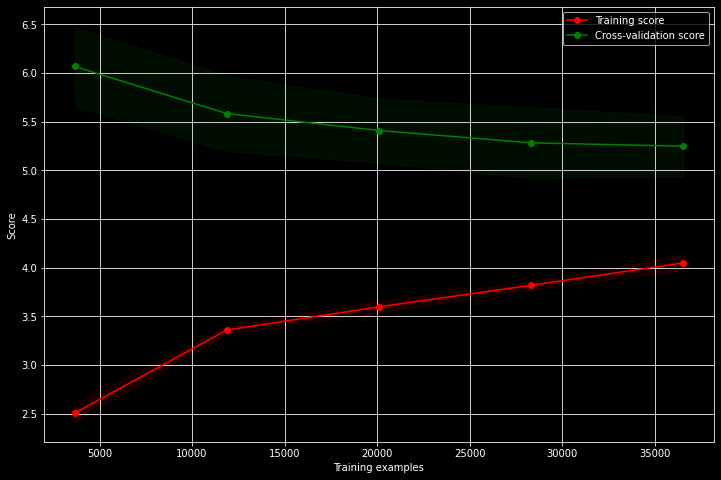

In [5]:
l.plot_learning_curve(model,X, y, target_log=True)

range(0, 20)
[0.42693928 0.18293847 0.08496    0.07694601 0.05057557 0.02660214
 0.02275351 0.01921985 0.01286437 0.01194424 0.01120852 0.00931752
 0.00631752 0.00622559 0.00497467 0.00493305 0.0048547  0.00470698
 0.00444134 0.00387087]


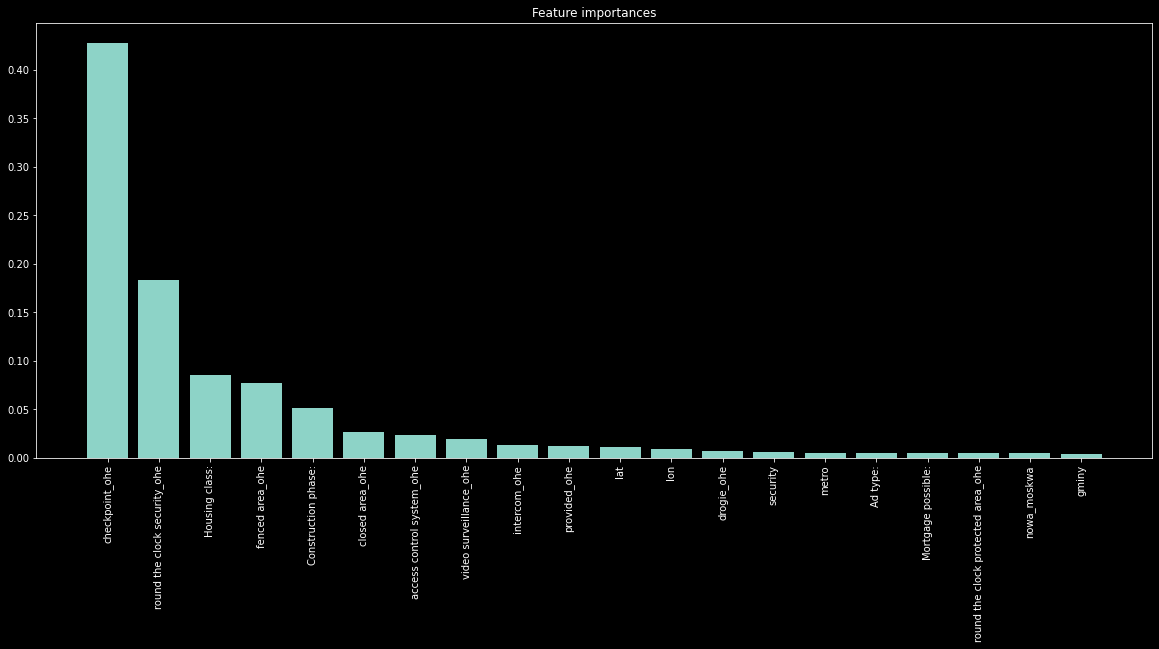

In [6]:
l.plot_feature_importances(model,df.columns.tolist(),  limit = 20)

### Uplad Colab

In [7]:
model.fit(df,np.log( train['price']).values) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=4, num_parallel_tree=1,
             obj=<function ln_exp_obj at 0x12d25eb80>, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
test = pd.read_hdf('data/property.test.h5')
df_test = feature_engineering.transform(test)

df_test = pipeline.transform(df_test[cat_feats+num_feats])

y_pred = model.predict(df_test)
y_pred = np.exp(y_pred)
y_pred[y_pred < 0] = 0 #czasem może być wartość ujemna

test['price'] = y_pred
test[ ['id', 'price'] ].to_csv('output/model_Xgboost_new_add_drogie.csv', index=False) 

/Users/ewa.suknarowska/Desktop/pml8_competition/utils/data_prepare.py:373: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["lat"], df["lon"] = df.lat_lon.str
